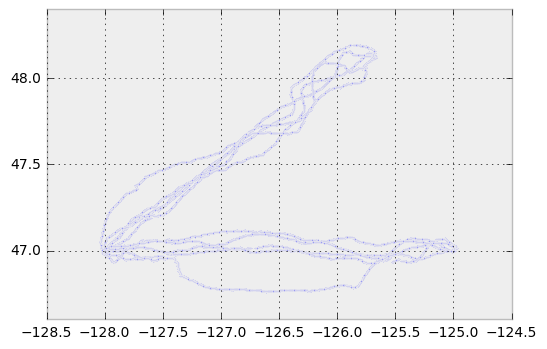

In [27]:
%matplotlib inline
import numpy as np 
import scipy.io
import glob
import matplotlib.pyplot as plt 
from netCDF4 import Dataset
from datetime import datetime, timedelta
import seawater as sw

# SG002
sg002_list = glob.glob('/Users/nap2/Documents/Seaglider/WA_Coast/Mapping/sg002/jan_04/Bin*.mat')
count = 0
for i in sg002_list:
    lg0 = scipy.io.loadmat(i)
    lg1 = lg0['section_bin']
    if count < 1: 
        Bin = lg1
    else:
        Bin = np.concatenate([Bin,lg1])
    
    count = count + 1
    
lat_002 = Bin[:,4]  
lon_002 = Bin[:,3]   
dives_002 = np.unique(Bin[:,0])
dive_002 = Bin[:,0]
p_002 = Bin[:,5]
temp_002 = Bin[:,6]
salinity_002 = Bin[:,7]   
time_002 = Bin[:,2]
pitch_002 = Bin[:,1]

plt.scatter(lon_002,lat_002,s=1)
plt.show()

Goal: convert .mat file into a dataframe that I can use to extract glider data 

In [4]:
from __future__ import (absolute_import, division, print_function)
import os

import matplotlib as mpl
# The two statemens below are used mainly to set up a plotting
# default style that's better than the default from Matplotlib 1.x
# Matplotlib 2.0 supposedly has better default styles.
import seaborn as sns
plt.style.use('bmh')

from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
from geopandas import GeoSeries, GeoDataFrame

data_pth = "../data"

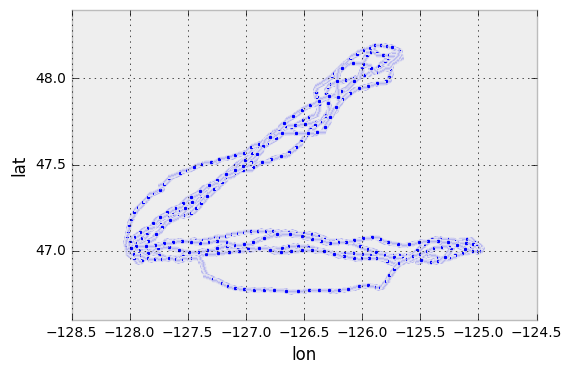

In [38]:
dim = np.shape(Bin)
glider = 2*np.ones(dim[0])
data = {'glider': glider, 'dive': Bin[:,0], 'pitch': Bin[:,1],
        'lat': Bin[:,4], 'lon': Bin[:,3],
        'press': Bin[:,5], 'temp': Bin[:,6], 'salin': Bin[:,7], 'density' 
        'time': Bin[:,2]}
geometry = [Point(xy) for xy in zip(data['lon'], data['lat'])]
df = pd.DataFrame(data)
df.plot.scatter(x='lon',y='lat',s=10, style='o');

In [39]:
df.head()

,dive,glider,lat,lon,pitch
0,7.0,2.0,46.997741,-125.012573,-1.0
1,7.0,2.0,46.997744,-125.012572,-1.0
2,7.0,2.0,46.997751,-125.012559,-1.0
3,7.0,2.0,46.997749,-125.012514,-1.0
4,7.0,2.0,46.997746,-125.012470,-1.0


Goals: 
1. isolate cape flattery and greys harbor transects 
2. isolate individual transects and plot as a function of distance offshore (use gdal...raster imaging) 

In [ ]:
# 1. 
for np.unique(data['dive']):
    